任务:基于zgpa_train.csv数据，建立RNN模型，预测股价
1.完成数据预处理,将序列数据转化为可用于RNN输入的数据
2.对新数据zgpa_test.csv进行预测，可视化结果
3.存储预测结果，并观察局部预测结果
备注:模型结构:单层RNN，输出有5个神经元;每次使用前8个数据预测第9个数据

In [1]:
#加载数据
import pandas as pd
import numpy as np

data = pd.read_csv('stock_data.csv')
data.head()

,date,open,high,low,close,volume
0,2020-01-01,115.886109,120.485993,111.609387,117.657854,930805
1,2020-01-02,190.120412,195.795915,187.635065,192.669203,339406
2,2020-01-03,130.411281,138.242198,127.146536,127.695174,213445
3,2020-01-04,136.054338,139.998624,132.087409,138.515098,79164
4,2020-01-05,116.654978,119.775803,114.434411,114.876968,13726


In [2]:
price = data.loc[:, 'close']
price.head()

0    117.657854
1    192.669203
2    127.695174
3    138.515098
4    114.876968
Name: close, dtype: float64

In [3]:
#归一化处理
price_norm = price / max(price)
price_norm.head()

0    0.587467
1    0.961999
2    0.637583
3    0.691607
4    0.573582
Name: close, dtype: float64

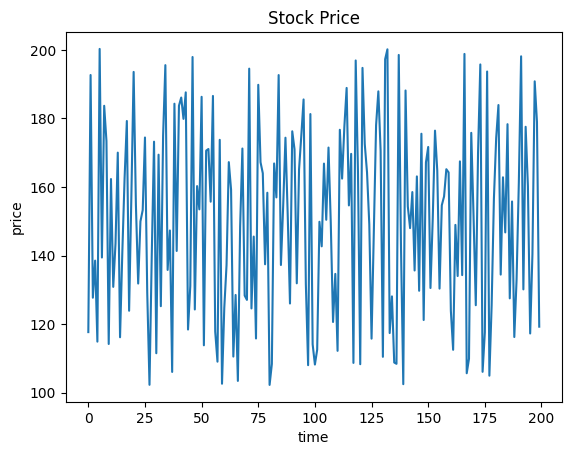

In [4]:
#可视化
from matplotlib import pyplot as plt 
fig1 = plt.figure()
plt.plot(price)
plt.title('Stock Price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()


In [ ]:
#define x and y
def extract_x_y(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    x = np.array(x)
    print(x.shape)
    x = x.reshape(x.shape[0], x.shape[1], 1)
    y = np.array(y)

    return x, y

In [15]:

time_step = 8
x, y = extract_x_y(price_norm, time_step)
x.shape, y.shape
print(x[0,:, :])

(192, 8)
[[0.58746697]
 [0.96199947]
 [0.63758342]
 [0.69160743]
 [0.57358198]
 [1.        ]
 [0.69612233]
 [0.91716434]]


In [16]:
#建立RNN模型
from os import access
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN


model = Sequential()
#add RNN layer
model.add(SimpleRNN(units=5, input_shape=(time_step, 1), activation='relu'))
#add output layer
model.add(Dense(units=1, activation='linear'))
#配置模型
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


2025-11-15 15:30:49.288867: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
#训练模型
model.fit(x, y, epochs=200, batch_size=16)

Epoch 1/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9963
Epoch 2/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1471 
Epoch 3/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8943 
Epoch 4/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2622 
Epoch 5/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8850 
Epoch 6/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5874 
Epoch 7/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3874 
Epoch 8/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2687 
Epoch 9/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2187 
Epoch 10/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1540 
Epoch 11/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0994 
Epoch 12/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1046 
Epoch 13/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1000 
Epoch 14/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0754 
Epoch 15/200
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss

In [20]:
#预测
y_train_predict = model.predict(x)*max(price)
y_train = y*max(price)
print(y_train_predict, y_train)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[174.80658 ]
 [159.12373 ]
 [146.21371 ]
 [152.8439  ]
 [145.61064 ]
 [150.67828 ]
 [152.17761 ]
 [137.3198  ]
 [137.02531 ]
 [146.60066 ]
 [164.07544 ]
 [130.88629 ]
 [157.20723 ]
 [169.5578  ]
 [159.08052 ]
 [145.52083 ]
 [157.37492 ]
 [155.32352 ]
 [162.08397 ]
 [143.35931 ]
 [129.62857 ]
 [134.58533 ]
 [152.66508 ]
 [120.98644 ]
 [152.21156 ]
 [127.260635]
 [158.30753 ]
 [160.15175 ]
 [155.8127  ]
 [149.28102 ]
 [130.63396 ]
 [169.3717  ]
 [137.51854 ]
 [176.94296 ]
 [164.55681 ]
 [181.34113 ]
 [176.08195 ]
 [154.29474 ]
 [155.3762  ]
 [179.90497 ]
 [149.20879 ]
 [160.49673 ]
 [152.492   ]
 [177.7086  ]
 [125.58136 ]
 [171.23308 ]
 [158.37923 ]
 [163.6332  ]
 [169.3939  ]
 [147.437   ]
 [134.27501 ]
 [155.21597 ]
 [126.6056  ]
 [127.581535]
 [126.61795 ]
 [150.38759 ]
 [133.6682  ]
 [125.59767 ]
 [128.64719 ]
 [110.848015]
 [134.24287 ]
 [141.40732 ]
 [132.57341 ]
 [123.687   ]
 [161.24307 ]
 [130.5763  ]
 [144.02263 ]
 [125.39454 ]
 [171.7262

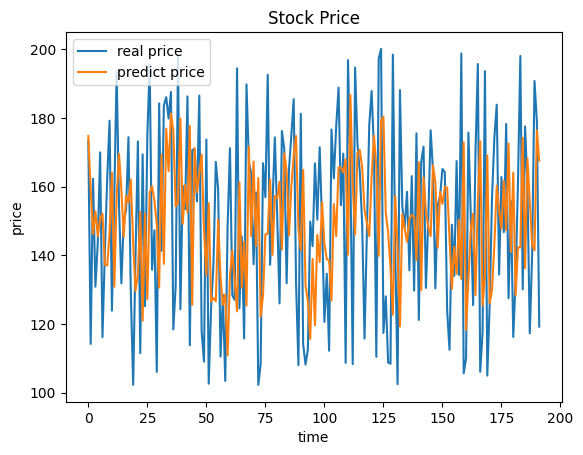

In [23]:
from cProfile import label


fig2 = plt.figure()
plt.plot(y_train, label='real price')
plt.plot(y_train_predict, label='predict price')
plt.title('Stock Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [28]:
data_test = pd.read_csv('stock_test_data.csv')
data_test.head()
price_test = data_test['close']
price_test.head()
#归一化，用price 最大值
price_test_norm = price_test / max(price)
x_test, y_test = extract_x_y(price_test_norm, time_step)
print(x_test.shape, len(y_test))

(42, 8)
(42, 8, 1) 42


In [29]:
#预测数据
y_test_predict = model.predict(x_test)*max(price)
y_test = y_test*max(price)
print(y_test_predict, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
[[149.0019  ]
 [153.95561 ]
 [134.208   ]
 [136.17644 ]
 [139.77222 ]
 [129.58528 ]
 [137.84233 ]
 [152.51436 ]
 [147.18068 ]
 [149.33884 ]
 [127.48957 ]
 [156.29567 ]
 [128.88269 ]
 [168.55717 ]
 [132.4957  ]
 [128.05093 ]
 [119.49377 ]
 [132.84506 ]
 [116.55253 ]
 [147.50563 ]
 [140.44234 ]
 [119.410675]
 [136.61868 ]
 [171.58983 ]
 [144.41628 ]
 [144.9025  ]
 [130.12059 ]
 [150.18231 ]
 [130.06622 ]
 [169.2418  ]
 [121.8136  ]
 [150.23546 ]
 [129.22835 ]
 [163.71182 ]
 [164.7261  ]
 [155.15187 ]
 [134.46855 ]
 [138.38977 ]
 [163.4907  ]
 [141.4321  ]
 [139.85886 ]
 [128.81854 ]] [147.06162761 124.13613499 131.95772268 152.01355147 128.03432928
 153.2853203  175.91468811 149.54661627 156.02273251 106.26959839
 164.45026831 127.84900699 182.27460776 134.20712258  98.74907989
 125.69017264 137.28773779 119.06474171 178.21443023 153.91989271
 107.73660935 154.66145794 202.57275819 141.85591362 136.11249636
 108.32584784 155.7204556  138.40450464 18

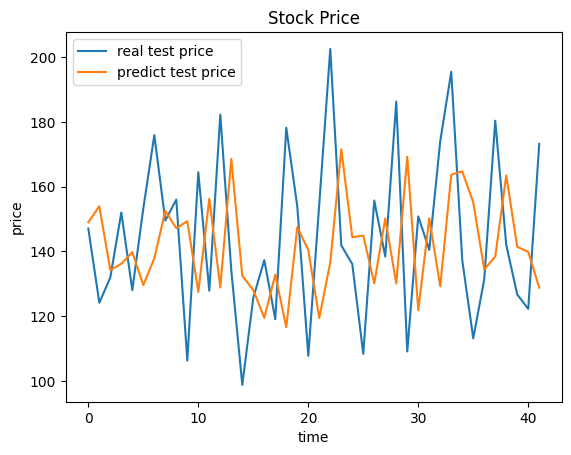

In [30]:
fig3 = plt.figure()
plt.plot(y_test, label='real test price')
plt.plot(y_test_predict, label='predict test price')
plt.title('Stock Price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [33]:
result_y_test = np.array(y_test).reshape(-1, 1)
result_y_test_predict = y_test_predict.reshape(-1, 1)
result_y_test.shape, result_y_test_predict.shape

result = np.concatenate((result_y_test, result_y_test_predict), axis=1)
result.shape
result = pd.DataFrame(result, columns=['real_price_test', 'predict_price_test'])
result.to_csv('stock_price_prediction_result.csv')